In [1]:
# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
%matplotlib inline

from tqdm import tqdm
import string
import statistics
import re
import joblib
import random
import statistics
from collections import Counter
from scipy import stats
import os

# import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity
import zipfile
from wordcloud import WordCloud
from matplotlib.lines import Line2D

In [2]:
# Import the Data
mir_link_id = pd.read_csv('/kaggle/input/media-study/mir_afsar_ali_yt_links - Sheet1.csv')


def extract_video_id(url):
    # Regular expression pattern to match YouTube video IDs
    pattern = r'(?:youtube\.com\/(?:[^\/\n\s]+\/\S+\/|(?:v|e(?:mbed)?)\/|\S*?[?&]v=)|youtu\.be\/)([a-zA-Z0-9_-]{11})'

    # Search for the video ID in the URL
    match = re.search(pattern, url)

    if match:
        return match.group(1)  # Return the matched video ID
    else:
        return None  # Return None if no match found

# Example URLs
urls = mir_link_id['yt_link']

video_ids = [extract_video_id(url) for url in urls]
mir_link_id['video_id'] = video_ids

print(mir_link_id.category.value_counts())


mirer_thek_vids = mir_link_id[mir_link_id['category'] == 'mirerthek']['video_id'].tolist()
mir_soho_vids = mir_link_id[mir_link_id['category'] == 'mir soho']['video_id'].tolist()
mir_chara_vids = mir_link_id[mir_link_id['category'] == 'mir chara']['video_id'].tolist()

print(f'{len(mirer_thek_vids)} {len(mir_soho_vids)} {len(mir_chara_vids)}')

category
mir soho     304
mir chara    168
mirerthek     62
Name: count, dtype: int64
62 304 168


In [3]:
print(len(set(mir_soho_vids)))

202


In [4]:
dfc = pd.read_csv('/kaggle/input/media-study2-0/final_video_info/mir_chara_vif.csv')
dfs = pd.read_csv('/kaggle/input/media-study2-0/final_video_info/mir_soho_vif.csv')
dft = pd.read_csv('/kaggle/input/media-study2-0/final_video_info/mirer_thek_vif.csv')

print(f'{dfc.shape} {dfs.shape} {dft.shape}')

(246, 9) (180, 9) (70, 9)


## Mir Chara Sunday Suspense

In [5]:
mc_com = pd.read_parquet('/kaggle/input/media-study2-0/final_comment_data/mir_chara_comment.parquet')
mc_chat = pd.read_csv('/kaggle/input/media-study2-0/all_live_chat/mir_chara_live_chat.csv')

ms_com = pd.read_parquet('/kaggle/input/media-study2-0/final_comment_data/mir_soho_comment.parquet')
ms_chat = pd.read_csv('/kaggle/input/media-study2-0/all_live_chat/mir_shoho_live_chat.csv')

mt_com = pd.read_csv('/kaggle/input/media-study2-0/final_comment_data/mirer_thek_comment.csv')
mt_chat = pd.read_csv('/kaggle/input/media-study2-0/all_live_chat/mirer_thek_live_chat.csv')

print(f'Length of Mir Chara Comments is {mc_com.shape}')
print(f'Length of Mir Chara live chat is {mc_chat.shape}')

print('Total Videos Scraped', mc_com['video_id'].nunique())

mc_com.head(3)

Length of Mir Chara Comments is (201633, 6)
Length of Mir Chara live chat is (343125, 4)
Total Videos Scraped 245


,author,published_date,published_time,like_count,text,video_id
0,@skmdimran852,2024-05-21,03:45:59Z,0,❤❤❤,SgqeN_FUprg
1,@tanvirhaquekhan6061,2024-05-20,14:25:10Z,0,সত্যজিত রায়ের মতো এমন দূরদর্শী মানুষ হাজার বছর...,SgqeN_FUprg
2,@MohammadArman-ob1id,2024-05-20,12:12:24Z,0,Mitryur porer abostha toh bollen na keno ami j...,SgqeN_FUprg


In [6]:
mc_chat.head(3)

,datetime,author,message,vid_id
0,2024-05-05 07:28:34,Paglamo Sudupaglamo,joy east bengal :red_square::yellow_square::re...,SgqeN_FUprg
1,2024-05-05 07:28:34,Soumen banarjee🙂,hi,SgqeN_FUprg
2,2024-05-05 07:28:37,Paglamo Sudupaglamo,joy east bengal :red_square::yellow_square::re...,SgqeN_FUprg


In [7]:
mc_com.drop(columns = ['published_time', 'video_id'], inplace=True)
ms_com.drop(columns = ['published_time', 'video_id'], inplace=True)
mt_com.drop(columns = ['published_time', 'video_id'], inplace=True)

mc_com.head(3)

,author,published_date,like_count,text
0,@skmdimran852,2024-05-21,0,❤❤❤
1,@tanvirhaquekhan6061,2024-05-20,0,সত্যজিত রায়ের মতো এমন দূরদর্শী মানুষ হাজার বছর...
2,@MohammadArman-ob1id,2024-05-20,0,Mitryur porer abostha toh bollen na keno ami j...


In [8]:
# Assuming df is your DataFrame
mc_com['text'] = mc_com['text'].astype(str)
ms_com['text'] = ms_com['text'].astype(str)
mt_com['text'] = mt_com['text'].astype(str)
mc_chat['message'] = mc_chat['message'].astype(str)

In [9]:
import langid

def detect_language(text):
    x = langid.classify(text)[0]
    if  x == 'bn':
        return 'bangla'
    elif x == 'en':
        return 'english'
    else:
        return 'banglish'


In [10]:
print(mt_com['text'][0])
detect_language(mt_com['text'][0])

Thanks Mr.mir


'english'

In [11]:
import langid
def clean_emoji(text):
    cleaned_text = re.sub('[^a-zA-z0-9\u0980-\u09FF,./!?$%&"\'\\-_;:।]'," ",text)
    return cleaned_text

tqdm.pandas()
ms_com['ctext'] = ms_com.text.progress_apply(clean_emoji)
mc_com['ctext'] = mc_com.text.progress_apply(clean_emoji)
mt_com['ctext'] = mt_com.text.progress_apply(clean_emoji)

100%|██████████| 99687/99687 [00:00<00:00, 110425.31it/s]


In [12]:
def detect_whitespace(text):
    return re.match(r'^\s*$', text) is not None

ms_com['language'] = ''
mc_com['language'] = ''
mt_com['language'] = ''


mt_com.head()

,author,published_date,like_count,text,public,ctext,language
0,@anwarulkabir6319,2024-05-16,0,Thanks Mr.mir,True,Thanks Mr.mir,
1,@JayitaKundu-fy3hp,2024-05-11,0,বিভূতিভূষণ বন্দ্যোপাধ্যায় এর আদৰ্শ হিন্দু হোটে...,True,বিভূতিভূষণ বন্দ্যোপাধ্যায় এর আদৰ্শ হিন্দু হোটে...,
2,@subi4098,2024-05-04,0,.vison boro fan tomar ami..mirchi te tomar gol...,True,.vison boro fan tomar ami..mirchi te tomar gol...,
3,@samhotibanerjee95,2024-05-03,0,এতো স্ট্রোরি টেলার আছে yt channel এ কিন্তু মীর...,True,এতো স্ট্রোরি টেলার আছে yt channel এ কিন্তু মীর...,
4,@malabikasengupta9803,2024-04-29,0,Khub bhalo laglo Mir.\nMone hochilo golper mod...,True,Khub bhalo laglo Mir. Mone hochilo golper modh...,


In [13]:
mc_com.isna().sum()

author            0
published_date    0
like_count        0
text              0
ctext             0
language          0
dtype: int64

### Adding Language in Mirer thek

In [14]:
# for ind in tqdm(mt_com.index):
#     if detect_whitespace(mt_com['ctext'][ind]) == False:
#         try:
#             lang=langid.classify(mt_com['ctext'][ind])
#         except:
#             lang[0]='no'
#         if lang[0] == "en":
#             mt_com.loc[ind,'language'] = "English"
#         elif lang[0] == "bn":
#             mt_com.loc[ind,'language'] = "Bengali"
#         elif lang[0] == "no":
#             mt_com.loc[ind,'language'] = "Unidentified"
#         else:
#             mt_com.loc[ind,'language'] = "Banglish"
#     elif detect_whitespace(mt_com['ctext'][ind]) == True:
#         mt_com.loc[ind,'language'] = "Emoji"

In [15]:
mt_com.head(3)

,author,published_date,like_count,text,public,ctext,language
0,@anwarulkabir6319,2024-05-16,0,Thanks Mr.mir,True,Thanks Mr.mir,
1,@JayitaKundu-fy3hp,2024-05-11,0,বিভূতিভূষণ বন্দ্যোপাধ্যায় এর আদৰ্শ হিন্দু হোটে...,True,বিভূতিভূষণ বন্দ্যোপাধ্যায় এর আদৰ্শ হিন্দু হোটে...,
2,@subi4098,2024-05-04,0,.vison boro fan tomar ami..mirchi te tomar gol...,True,.vison boro fan tomar ami..mirchi te tomar gol...,


In [16]:
# mt_com.language.value_counts()

In [17]:
# filt = mt_com[mt_com['language']=='Emoji']
# filt

In [18]:
# filt.isna().sum()

In [19]:
# mt_com.dropna(inplace=True)
# mt_com.isna().sum()

In [20]:
# mt_com.to_parquet('/kaggle/working/mirer_thek_comment.parquet', index=False)

### Adding Language in Mir chara

In [21]:
# for ind in tqdm(mc_com.index):
#     if detect_whitespace(mc_com['ctext'][ind]) == False:
#         try:
#             lang=langid.classify(mc_com['ctext'][ind])
#         except:
#             lang[0]='no'
#         if lang[0] == "en":
#             mc_com.loc[ind,'language'] = "English"
#         elif lang[0] == "bn":
#             mc_com.loc[ind,'language'] = "Bengali"
#         elif lang[0] == "no":
#             mc_com.loc[ind,'language'] = "Unidentified"
#         else:
#             mc_com.loc[ind,'language'] = "Banglish"
#     elif detect_whitespace(mc_com['ctext'][ind]) == True:
#         mc_com.loc[ind,'language'] = "Emoji"

In [22]:
mc_com.head(3)

,author,published_date,like_count,text,ctext,language
0,@skmdimran852,2024-05-21,0,❤❤❤,,
1,@tanvirhaquekhan6061,2024-05-20,0,সত্যজিত রায়ের মতো এমন দূরদর্শী মানুষ হাজার বছর...,সত্যজিত রায়ের মতো এমন দূরদর্শী মানুষ হাজার বছর...,
2,@MohammadArman-ob1id,2024-05-20,0,Mitryur porer abostha toh bollen na keno ami j...,Mitryur porer abostha toh bollen na keno ami j...,


In [23]:
# mc_com.language.value_counts()

In [24]:
# mt_com.dropna(inplace=True)
# mc_com.isna().sum()

In [25]:
# mc_com.to_parquet('/kaggle/working/mir_chara_comment.parquet', index=False)

### Adding Language in Mir Shoho

In [26]:
# for ind in tqdm(ms_com.index):
#     if detect_whitespace(ms_com['ctext'][ind]) == False:
#         try:
#             lang=langid.classify(ms_com['ctext'][ind])
#         except:
#             lang[0]='no'
#         if lang[0] == "en":
#             ms_com.loc[ind,'language'] = "English"
#         elif lang[0] == "bn":
#             ms_com.loc[ind,'language'] = "Bengali"
#         elif lang[0] == "no":
#             ms_com.loc[ind,'language'] = "Unidentified"
#         else:
#             ms_com.loc[ind,'language'] = "Banglish"
#     elif detect_whitespace(ms_com['ctext'][ind]) == True:
#         ms_com.loc[ind,'language'] = "Emoji"

In [27]:
# ms_com.head(3)

In [28]:
# ms_com.isna().sum()

In [29]:
# ms_com.language.value_counts()

In [30]:
# ms_com.to_parquet('/kaggle/working/mir_shoho_comment.parquet', index=False)

In [31]:
# df = pd.read_parquet('/kaggle/working/mir_shoho_comment.parquet')
# df.shape

## Start From Here
## Reload them all

In [32]:
# df1 = pd.read_parquet('/kaggle/working/mir_shoho_comment.parquet')
# df2 = pd.read_parquet('/kaggle/working/mir_chara_comment.parquet')
# df3 = pd.read_parquet('/kaggle/working/mirer_thek_comment.parquet')

In [33]:
df1 = pd.read_parquet('/kaggle/input/media-study2-0/language/mir_shoho_comment.parquet')
df2 = pd.read_parquet('/kaggle/input/media-study2-0/language/mir_chara_comment.parquet')
df3 = pd.read_parquet('/kaggle/input/media-study2-0/language/mirer_thek_comment.parquet')

In [34]:
print(df1.shape, df2.shape, df3.shape)

(445398, 6) (201633, 6) (99686, 7)


In [35]:
# print(df1.shape, df2.shape, df3.shape)

In [36]:
df1.head(3)

,author,published_date,like_count,text,ctext,language
0,@Storysuspensecomedy123,2023-01-25,1,Mirda তুমি আমাকে তৈরি করে নাও। আমার জীবন ও ভবি...,Mirda তুমি আমাকে তৈরি করে নাও। আমার জীবন ও ভবি...,Bengali
1,@kumkumdas9131,2023-01-25,0,তারানাথ তান্ত্রিকের অপেক্ষায় থাকলাম মীর দা,তারানাথ তান্ত্রিকের অপেক্ষায় থাকলাম মীর দা,Bengali
2,@golamrabbani8765,2023-01-25,0,আপনার কন্ঠে শার্লক হোমস আবারও শুনতে চাই❤️❤️❤️,আপনার কন্ঠে শার্লক হোমস আবারও শুনতে চাই,Bengali


In [37]:
filt = df1[df1['language'] == 'Emoji']
filt.head(3)

,author,published_date,like_count,text,ctext,language
9,@rajarshikoner3528,2023-01-25,0,❤❤❤❤,,Emoji
34,@joymondal1013,2023-01-25,0,❤️❤️❤️❤️,,Emoji
42,@souvikmodak7194,2023-01-25,0,❤️🌻,,Emoji


In [38]:
df1.loc[df1['language'] == 'Emoji', 'ctext'] = df1['text']

In [39]:
filt = df1[df1['language'] == 'Emoji']
filt.head(3)

,author,published_date,like_count,text,ctext,language
9,@rajarshikoner3528,2023-01-25,0,❤❤❤❤,❤❤❤❤,Emoji
34,@joymondal1013,2023-01-25,0,❤️❤️❤️❤️,❤️❤️❤️❤️,Emoji
42,@souvikmodak7194,2023-01-25,0,❤️🌻,❤️🌻,Emoji


In [40]:
df1.head(3)

,author,published_date,like_count,text,ctext,language
0,@Storysuspensecomedy123,2023-01-25,1,Mirda তুমি আমাকে তৈরি করে নাও। আমার জীবন ও ভবি...,Mirda তুমি আমাকে তৈরি করে নাও। আমার জীবন ও ভবি...,Bengali
1,@kumkumdas9131,2023-01-25,0,তারানাথ তান্ত্রিকের অপেক্ষায় থাকলাম মীর দা,তারানাথ তান্ত্রিকের অপেক্ষায় থাকলাম মীর দা,Bengali
2,@golamrabbani8765,2023-01-25,0,আপনার কন্ঠে শার্লক হোমস আবারও শুনতে চাই❤️❤️❤️,আপনার কন্ঠে শার্লক হোমস আবারও শুনতে চাই,Bengali


In [41]:
df2.loc[df2['language'] == 'Emoji', 'ctext'] = df2['text']
df3.loc[df3['language'] == 'Emoji', 'ctext'] = df3['text']

In [42]:
df3.drop(['public'], inplace=True, axis=1)
df3['text'][0]

'Thanks Mr.mir'

In [43]:
df3 = df3.sort_values(by='like_count', ascending=False).reset_index(drop=True)
df3.head(5)

,author,published_date,like_count,text,ctext,language
0,@SubashishChakraborty,2023-03-04,4209,"আজ ""ব্রহ্মপিশাচ"", কাল সানডে সাসপেন্সে"" জলপিশাচ...","আজ ""ব্রহ্মপিশাচ"", কাল সানডে সাসপেন্সে"" জলপিশাচ...",Bengali
1,@sakilahamed5070,2023-09-16,2828,সোমক দা❤ কে গপ্পো মীরের ঠেকে নিয়মিত শুনতে চায...,সোমক দা কে গপ্পো মীরের ঠেকে নিয়মিত শুনতে চায...,Bengali
2,@gouravkayal4650,2023-08-26,2588,দাদার গলায় তারানাথ তান্ত্রিক চরিত্রটি শুনতে ক...,দাদার গলায় তারানাথ তান্ত্রিক চরিত্রটি শুনতে ক...,Bengali
3,@arunavakarmakar8147,2023-02-12,2453,কে কে চায় যে আবার মীরদার কন্ঠে তারানাথ তান্ত্র...,কে কে চায় যে আবার মীরদার কন্ঠে তারানাথ তান্ত্র...,Bengali
4,@gouravkayal4650,2023-08-12,1842,দাদার কণ্ঠে কে কে বিভূতিবাবুর লেখা 'আরণ্যক' উপ...,দাদার কণ্ঠে কে কে বিভূতিবাবুর লেখা 'আরণ্যক' উপ...,Bengali


In [44]:
df2 = df2.sort_values(by='like_count', ascending=False).reset_index(drop=True)
df2.head(5)

,author,published_date,like_count,text,ctext,language
0,@koushikdas7808,2022-07-31,6850,মীর কে লক্ষ লক্ষ মানুষ শুনতে ভালোবাসে। তাই আমি...,মীর কে লক্ষ লক্ষ মানুষ শুনতে ভালোবাসে। তাই আমি...,Bengali
1,@adityapaul2361,2022-11-20,5144,আমার মতো মীর দা ও তারানাথ তান্ত্রিককে কে কে চা...,আমার মতো মীর দা ও তারানাথ তান্ত্রিককে কে কে চা...,Bengali
2,@Jeetbose15,2022-10-08,4880,এক পুরনো শ্রোতা এবং Sunday Suspense এর শুভাকাঙ...,এক পুরনো শ্রোতা এবং Sunday Suspense এর শুভাকাঙ...,Bengali
3,@SarthakJasu,2023-03-05,4130,Mir Da সেরা ছিল but Deep দা তুমি যে এইভাবে আমা...,Mir Da সেরা ছিল but Deep দা তুমি যে এইভাবে আমা...,Bengali
4,@surajitbarman8525,2023-01-07,3562,কয়েকদিন পর থেকে সেমিস্টার এর পরীক্ষা শুরু হবে...,কয়েকদিন পর থেকে সেমিস্টার এর পরীক্ষা শুরু হবে...,Bengali


In [45]:
df1 = df1.sort_values(by='like_count', ascending=False).reset_index(drop=True)
df1.head(5)

,author,published_date,like_count,text,ctext,language
0,@wolfhowling220,2021-12-19,5373,"Sunday suspense er শ্রোতাদের মধ্যে কে কে ""The ...","Sunday suspense er শ্রোতাদের মধ্যে কে কে ""The ...",Bengali
1,@ksarkar1338,2021-12-03,4929,বেঁচে থাকতে হয়তো বিশ্ব সাহিত্যের যেসব গল্প কো...,বেঁচে থাকতে হয়তো বিশ্ব সাহিত্যের যেসব গল্প কো...,Bengali
2,@dcsalim4384,2021-12-12,4830,এ আমার পরম সৌভাগ্য যে একজন বাঙালি হয়ে জন্মেছি ...,এ আমার পরম সৌভাগ্য যে একজন বাঙালি হয়ে জন্মেছি ...,Bengali
3,@AmioPariGuru,2022-01-22,4551,কে কে মনে করেন 'The count of Monte Christo' এই...,কে কে মনে করেন 'The count of Monte Christo' এই...,Bengali
4,@rishiupadhyay3956,2022-05-22,3953,"একটা ছোট্ট request, Alexender Dumas series যখন...","একটা ছোট্ট request, Alexender Dumas series যখন...",Bengali


In [46]:
def remove_extra_spaces(text):
    # Split the text by whitespace and then join it back with a single space
    cleaned_text = ' '.join(text.split())
    return cleaned_text

df1['ctext'] = df1['ctext'].apply(remove_extra_spaces)
df2['ctext'] = df2['ctext'].apply(remove_extra_spaces)
df3['ctext'] = df3['ctext'].apply(remove_extra_spaces)

In [47]:
# say threshold is 20k
threshold = 10_00

test_textms = df1[:threshold]['ctext'].tolist()
lang_ms = df1[:threshold]['language'].tolist()

print(test_textms[:1])
print(lang_ms[:1])

test_textmc = df2[:threshold]['ctext'].tolist()
lang_mc = df2[:threshold]['language'].tolist()

print(test_textmc[:1])
print(lang_mc[:1])


test_textmt = df3[:threshold]['ctext'].tolist()
lang_mt = df3[:threshold]['language'].tolist()

print(test_textmt[:1])
print(lang_mt[:1])


print(f'\n{len(test_textmc)}')

['Sunday suspense er শ্রোতাদের মধ্যে কে কে "The count of Monte Cristo" শুনেছ ?']
['Bengali']
['মীর কে লক্ষ লক্ষ মানুষ শুনতে ভালোবাসে। তাই আমি মনে করি শ্রোতাদের কথা মাথায় রেখে Sunday suspense টা তার চালিয়ে যাওয়া উচিত ছিল। যেরকম দীপ এখনো করে। মীরকে ছারা ব্যোমকেশ, তারানাথ চরিত্র গুলো ভাবা যায়না। আপনাদের কি মতামত?']
['Bengali']
['আজ "ব্রহ্মপিশাচ", কাল সানডে সাসপেন্সে" জলপিশাচ"। জমে যাবে পুরো। কিন্তু যতই বলো, তারানাথের চরিত্রটি মীরের কন্ঠ ছাড়া মানায় না।']
['Bengali']

1000


In [48]:
# pip install git+https://github.com/csebuetnlp/normalizer

In [49]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
device

cuda:0


device(type='cuda', index=0)

In [50]:
from transformers import pipeline
classifier_en = pipeline("text-classification",model='bhadresh-savani/bert-base-uncased-emotion',
                         return_all_scores=False, truncation=True, device=device)

2024-06-12 18:33:43.952772: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-12 18:33:43.952873: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-12 18:33:44.078204: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/935 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [51]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli", device=device)

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [52]:
prediction = classifier("I love using transformers. The best part is wide range of support and its easy to use", ['good', 'bad', 'neutral'])
prediction

{'sequence': 'I love using transformers. The best part is wide range of support and its easy to use',
 'labels': ['good', 'neutral', 'bad'],
 'scores': [0.9879899621009827, 0.009024858474731445, 0.002985224826261401]}

In [53]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from transformers import AutoModelForPreTraining, AutoTokenizer
# from normalizer import normalize 


# MODEL BANGLA
# check_point = "csebuetnlp/banglishbert"
modelcp = '/kaggle/input/trained-models/emo_model_dis'
checkpoint = "csebuetnlp/banglabert"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(modelcp)

print(model.config)

tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

ElectraConfig {
  "_name_or_path": "/kaggle/input/trained-models/emo_model_dis",
  "architectures": [
    "ElectraForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "embedding_size": 768,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "electra",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "summary_activation": "gelu",
  "summary_last_dropout": 0.1,
  "summary_type": "first",
  "summary_use_proj": true,
  "torch_dtype": "float32",
  "transformers_version": "4.38.2

In [54]:
new_label_mapping = {
     0: "love",
     1: "sad",
     2: "anger",
     3: "fear"
}
model.config.id2label = new_label_mapping
model.config.label2id = {v: int(k) for k, v in new_label_mapping.items()}

In [55]:
input_text = 'অনেক ভালো গল্প।'
# input_text = 'খুব বাজে গল্প। অনেক খারাপ লাগছে শুনতে।'
# input_text = "very bad story."
print(tokenizer.tokenize(input_text))

['অনেক', 'ভালো', 'গল্প', '।']


In [56]:
input_text = 'অনেক ভালো গল্প।'
# input_text = "মীর ছাড়া sunday suspense শুনতে ভালো লাগে  না"
# input_text = "very bad story."
print(tokenizer.tokenize(input_text))


inputs = tokenizer(input_text, return_tensors="pt").to(device) # Tokenize and convert to tensors
inputs.pop("token_type_ids", None)
print(inputs)
model = model.to(device)
outputs = model(**inputs)  
logits = outputs.logits 
print(logits)
probabilities = torch.nn.functional.softmax(logits, dim=-1)
print(probabilities)

predicted_class_index = logits.argmax(-1).item()
predicted_class = model.config.id2label[predicted_class_index]
predicted_probability = probabilities[0][predicted_class_index].item()
print("Predicted sentiment:", predicted_class, "with probability:", predicted_probability)

['অনেক', 'ভালো', 'গল্প', '।']
{'input_ids': tensor([[   2, 1011, 1055, 1705,  205,    3]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]], device='cuda:0')}
tensor([[ 7.6101, -2.0278, -3.2038, -2.7896]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
tensor([[9.9988e-01, 6.5197e-05, 2.0116e-05, 3.0438e-05]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
Predicted sentiment: love with probability: 0.9998842477798462


In [57]:
def predict(txt, model):
    '''
    Implements our awsome algorithm and gives final output
    '''
    inputs = tokenizer(txt, return_tensors="pt").to(device)
    model = model.to(device)
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=-1)
    predicted_class_index = logits.argmax(-1).item()
    predicted_class = model.config.id2label[predicted_class_index]
    predicted_probability = probabilities[0][predicted_class_index].item()
    return [predicted_class, predicted_probability]

In [58]:
ri = np.random.randint(0, len(df3))
text = df3['ctext'][ri]
# text = 'ও মাই ঘট, টাইগার'

print(ri)
print(classifier_en(text))

print(f'\nBangla Bert {predict(text, model)}\n')

candidate_labels = ['love', 'sad', 'fear', 'anger', 'surprise']
# candidate_labels = ['আনন্দ', 'দুঃখ', 'অবাক হওয়া', 'ভয়', 'রাগ']
# print(classifier(text, candidate_labels, multi_label=True)['labels'])
classifier(text, candidate_labels, multi_label=False)

23167
[{'label': 'joy', 'score': 0.585852324962616}]

Bangla Bert ['love', 0.9988873600959778]



{'sequence': 'আ, সালাম, আলেকুম, মীর, সাহেব, আপনার নতুন, ঠেকের, নিত্য, শ্রোতা, আমি, খুব, ভালো, উদ্দোগ, একটা, অনুরোধ, করছি, একদম, প্রথম, দিকের,ভিত্তিতে,মে, গল্প,গূলো,পাঠ, করতেন,যেগুলো, আমরা, সবাই, ভুলে, গেছি, সেগুলো, আবার, নতুন, করে, শুরু, করুন, ভালো, থাকবেন,',
 'labels': ['surprise', 'anger', 'sad', 'fear', 'love'],
 'scores': [0.3211183547973633,
  0.22786542773246765,
  0.2226012498140335,
  0.1660836637020111,
  0.06233130395412445]}

In [59]:
def final(text, lang, modelx):
    '''
    Implements our awsome algorithm and gives final output
    '''
    
#     print(x)
    if lang == 'Bengali':
        tokenized_text = tokenizer(text,
                                    return_tensors="pt").to(device)

        with torch.no_grad():
            modelx = modelx.to(device)
            pred = modelx(**tokenized_text)
            logits = pred.logits
            probas = torch.nn.functional.softmax(logits, dim=1).to('cpu')
            predicted_class = torch.argmax(probas, dim=1).item()
    #         print(predicted_class)
    #         x.append(probas.numpy().flatten())
        return model.config.id2label[predicted_class]
    
    elif lang == 'English':
        try:
            return classifier_en(text)[0]['label']
        except:
            candidate_labels = ['love', 'sadness', 'fear', 'anger']
            return classifier(text, candidate_labels, multi_label=True)['labels'][0]
    else:
        candidate_labels = ['love', 'sadness', 'fear', 'anger']
        return classifier(text, candidate_labels, multi_label=True)['labels'][0]

In [60]:
def finalv2(text,lang, modelx):
    '''
    Implements our awsome algorithm and gives final output
    '''
    
#     print(x)
    if lang == 'Bengali':
        candidate_labels = ['ভালো', 'খারাপ' , 'নিরপেক্ষ']
        return classifier(text, candidate_labels, multi_label=False)['labels'][0]
    
    else:
        candidate_labels = ['good', 'bad', 'neutral']
        return classifier(text, candidate_labels, multi_label=False)['labels'][0]

In [61]:
def finalv3(row):
    '''
    Implements our awsome algorithm and gives final output
    '''
    text = row['ctext']
    lang = row['language']
#     print(x)
    if lang == 'Bengali':
        candidate_labels = ['ভালো', 'খারাপ' , 'নিরপেক্ষ']
        return classifier(text, candidate_labels, multi_label=False)['labels'][0]
    
    else:
        candidate_labels = ['good', 'bad', 'neutral']
        return classifier(text, candidate_labels, multi_label=False)['labels'][0]

In [62]:
for i in range(5):    
    ri = np.random.randint(0, len(df3))
    input_text = df3['ctext'][ri]
    lang = df3['language'][ri]
    print(input_text, lang)

    predicted_class = final(input_text, lang, model)
    print(predicted_class)
    print()

Ha English
anger

https://youtu.be/QkTpYRCVmUs English
joy

মীরদা আমার রোজের অফিস যাওয়ার পথের সঙ্গী তুমি । এগিয়ে যাও Bengali
love

তুমি পুরো স্ট্রেট ফরোয়ার্ড আর খুব ফাস্ট করে ফেলেছ গপ্পো টা। অনেক ফোল্ড বাদ দিয়ে দিয়েছো বিশেষ করে টবি কে আনার পার্ট টা তো বটেই। 3 টে পার্ট করতেই পরতে গপ্পো গুলো নিজের মত ছোট কোরোনা Bengali
love

Taranath Tantrik theke Bhoirob Tantrik, sob kota golpoi jibonta hoy utbe, jodi tar voice dayn apni.........Osadharon English
anger



In [63]:
# say threshold is 20k
threshold = 10_0

test_textms = df1[:threshold]['ctext'].tolist()
lang_ms = df1[:threshold]['language'].tolist()

print(test_textms[:1])
print(lang_ms[:1])

test_textmc = df2[:threshold]['ctext'].tolist()
lang_mc = df2[:threshold]['language'].tolist()

print(test_textmc[:1])
print(lang_mc[:1])


test_textmt = df3[:threshold]['ctext'].tolist()
lang_mt = df3[:threshold]['language'].tolist()

print(test_textmt[:1])
print(lang_mt[:1])


print(f'\n{len(test_textmc)}')

['Sunday suspense er শ্রোতাদের মধ্যে কে কে "The count of Monte Cristo" শুনেছ ?']
['Bengali']
['মীর কে লক্ষ লক্ষ মানুষ শুনতে ভালোবাসে। তাই আমি মনে করি শ্রোতাদের কথা মাথায় রেখে Sunday suspense টা তার চালিয়ে যাওয়া উচিত ছিল। যেরকম দীপ এখনো করে। মীরকে ছারা ব্যোমকেশ, তারানাথ চরিত্র গুলো ভাবা যায়না। আপনাদের কি মতামত?']
['Bengali']
['আজ "ব্রহ্মপিশাচ", কাল সানডে সাসপেন্সে" জলপিশাচ"। জমে যাবে পুরো। কিন্তু যতই বলো, তারানাথের চরিত্রটি মীরের কন্ঠ ছাড়া মানায় না।']
['Bengali']

100


In [64]:
# preds = []
# for i in tqdm(range(len(test_textms))):
#     x = final(test_textms[i], lang_ms[i], model)
#     preds.append(x)

In [65]:
test_textms[42]

'বাপরে বাপ । ভুতের সিনেমাতেও এত ভয় লাগেনা । সানডে সাসপেন্স টিম জিন্দাবাদ'

In [66]:
final(test_textms[42], lang_ms[42], model)

'love'

In [67]:
from tqdm.notebook import tqdm

# Using a list comprehension with tqdm for progress tracking in a Jupyter notebook
preds1 = [final(test_textms[i], lang_ms[i], model) for i in tqdm(range(len(test_textms)))]

  0%|          | 0/100 [00:00<?, ?it/s]

In [68]:
# classifier_f = pipeline("text-classification",model='bhadresh-savani/bert-base-uncased-emotion',
#                          return_all_scores=False, device=device, truncation=True)

In [69]:
x = 6
print(test_textmc[x], lang_mc[x])
print(classifier(test_textmc[x], ['happy', 'sad', 'anger'])['labels'])
# classifier_f(test_textmc[x])

'বিভূতিভূষণ বন্দ্যোপাধ্যায়' রচিত 'আরণ্যক' উপন্যাস চলিত ভাষায় শুনতে চাই আমরা সবাই .! সামনেই সেপ্টেম্বর মাস মানে 'বিভূতিভূষণ বন্দ্যোপাধ্যায়' মাস !.একটাই অনুরোধ সামনের মাসে যদি বিভূতিভূষণ মাস হয় তবে খুব খুশি হবে mirchi fan রা । Bengali
['anger', 'happy', 'sad']


In [70]:
# lang_mc[590:600]

In [71]:
preds2 = [final(test_textmc[i], lang_mc[i], model) for i in tqdm(range(len(test_textmc)))]

  0%|          | 0/100 [00:00<?, ?it/s]

In [72]:
preds3 = [final(test_textmt[i], lang_mt[i], model) for i in tqdm(range(len(test_textmt)))]

  0%|          | 0/100 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [73]:
result1 = pd.DataFrame({'comment':test_textms,'lang':lang_ms, 'sentiment':preds1})
result2 = pd.DataFrame({'comment':test_textmc,'lang':lang_mc, 'sentiment':preds2})
result3 = pd.DataFrame({'comment':test_textmt,'lang':lang_mt, 'sentiment':preds3})
result1

,comment,lang,sentiment
0,"Sunday suspense er শ্রোতাদের মধ্যে কে কে ""The ...",Bengali,love
1,বেঁচে থাকতে হয়তো বিশ্ব সাহিত্যের যেসব গল্প কো...,Bengali,love
2,এ আমার পরম সৌভাগ্য যে একজন বাঙালি হয়ে জন্মেছি ...,Bengali,love
3,কে কে মনে করেন 'The count of Monte Christo' এই...,Bengali,love
4,"একটা ছোট্ট request, Alexender Dumas series যখন...",Bengali,love
...,...,...,...
95,"রবিবার পুরো জমে ক্ষীর,,, ছক্কার পর ছক্কা,,,,আগ...",Bengali,love
96,মির্চি বাংলা ক্ষমতা রাখে যেকোনো সময় যেকোনো সি...,Bengali,love
97,"কে বলেছে আমার বন্ধু নেই, আমার ১২ বছরের বন্ধু ত...",Bengali,love
98,রক্তপিপাসু পিশাচ জানিনা কতদিন এই ৬ ঘন্টার গল্প...,Bengali,love


In [74]:
result1.lang.value_counts(), result2.lang.value_counts()

(lang
 Bengali     95
 English      3
 Banglish     2
 Name: count, dtype: int64,
 lang
 Bengali     98
 Banglish     2
 Name: count, dtype: int64)

In [75]:
x = 33
for i, r in result1[x:x+10].iterrows():
    print(r['sentiment'], r['lang'] ,r['comment'])
    print()

love Bengali লন্ডনে ফেলুদা টা আনা হোক, সমর্থন করলে লাইক ঠোক সবাই, please ! ইতি এক একনিষ্ঠ শ্রোতা।

sad Bengali কমেন্ট টা ডিলিট করলাম। রিপ্লাই দেখে লাভ নেই!

love Bengali রাত্রে Sunday suspense শুনতে শুনতে ঘুম পড়ে জাওয়া শ্রোতারা কই?? লাইক দিয়ে যান!!

love Bengali এক সাধারণ বাঙালী জমিদার ছেলের সমুদ্রে পাড়ি দেওয়ার গল্প ...ভারত মহাসাগরের করাগারে রক্ষিত এক বিপুল ধন-সম্পদ রহস্য আবিষ্কারের গল্প ... বিভূতিভূষণ বন্দ্যোপাধ্যায় এর এক অসাধারণ সাহিত্যের কৃর্তি ...হীরে মানিক জ্বলে

anger Banglish Ke ke 4-5 bochor dhore Sunday সাসপেন্স শুনছেন

anger English How many students are here

love Bengali "গল্প পাঠে মীর" ----- এই লাইনটা শুনলেই আমার মন আনন্দে ভরে যায়

love Bengali মীর দা তুমি অনন্য, তোমার গলার আওয়াজে কখনো অনুপ্রাণিত হয়েছে, কখনো মন খুলে হেসেছি আবার কখনো বালিশ চোখের জলে ভিজিয়েছি। অপ্রিয় হল এটাই সত্য তোমাকে আর মনে হয় না কখনো mirchi 98.3 টে বলতে শুনতে পাবো my dear Watson.... আশা করি তোমার এই অনুপস্থিতি টিম মিরচি কখনোই আমাদের বুঝতে দিবে না

love Bengali ব্যোমকেশের গল্পের ভক্ত এখানে কারা আছো 

In [76]:
print(result1.sentiment.value_counts().sort_index(),end='\n')
print(result2.sentiment.value_counts().sort_index(),end='\n')
print(result3.sentiment.value_counts().sort_index())

sentiment
anger     2
joy       1
love     93
sad       4
Name: count, dtype: int64
sentiment
anger     1
love     96
sad       3
Name: count, dtype: int64
sentiment
anger       1
joy         2
love       94
sad         2
sadness     1
Name: count, dtype: int64


In [77]:
result2.sentiment.value_counts().sort_index()

sentiment
anger     1
love     96
sad       3
Name: count, dtype: int64

In [78]:
result2.head(2)

,comment,lang,sentiment
0,মীর কে লক্ষ লক্ষ মানুষ শুনতে ভালোবাসে। তাই আমি...,Bengali,love
1,আমার মতো মীর দা ও তারানাথ তান্ত্রিককে কে কে চায়,Bengali,love


In [79]:
spm = []
spm.append(result1.sentiment.value_counts().sort_index().tolist())
spm.append(result2.sentiment.value_counts().sort_index().tolist())
spm.append(result3.sentiment.value_counts().sort_index().tolist())
# spm = np.array(spm)
spm

[[2, 1, 93, 4], [1, 96, 3], [1, 2, 94, 2, 1]]

In [80]:
# sums = np.sum(spm, axis=1)
# # Normalize each inner array to percentages
# spm2 = (spm.T / sums).T * 100
# print(spm2)

In [81]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Define custom colors for each sentiment type
# colors = ['#2E9BFF', '#987BE9', '#FF7C7C', '#58D68D', 'red', 'green', 'blue']

# species = (
#     "Mir Soho",  
#     "Mir Chara", 
#     "Mir Er Thek",  
# )
# weight_counts = {
#     "Anger": spm2.T[0],
#     "Fear": spm2.T[1],
#     'Joy':spm2.T[2],
#     "Love": spm2.T[3],
#     "Sad": spm2.T[4],
#     "Sadness": spm2.T[5],
#     "Surprise":spm2.T[6]
# }

# # Calculate the number of sentiment types
# num_sentiments = len(weight_counts)

# # Adjust width based on the number of sentiment types
# width = 0.4

# fig, ax = plt.subplots(figsize=(8, 6))

# # Initialize bottom values with zeros for stacking
# bottom = np.zeros(len(species))

# # Stack the bars for each sentiment type with custom colors
# for i, (sentiment, count) in enumerate(weight_counts.items()):
#     plt.bar(species, count, width, label=sentiment, bottom=bottom, color=colors[i])
#     bottom += count  # Update bottom for stacking

# # Add labels and title
# plt.xlabel("Species")
# plt.ylabel("Number of Occurrences")
# plt.title("Distribution of Sentiment")

# # Adjust legend location
# plt.legend(loc="best")

# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


## Directly Apply on the DF

In [82]:
def finalv4(row, modelx):
    '''
    Implements our awsome algorithm and gives final output
    '''
    text = row['ctext']
    lang = row['language']
    
#     print(x)
    if lang == 'Bengali':
        tokenized_text = tokenizer(text,
                                    return_tensors="pt",  truncation=True, max_length=512).to(device)

        with torch.no_grad():
            modelx = modelx.to(device)
            pred = modelx(**tokenized_text)
            logits = pred.logits
            probas = torch.nn.functional.softmax(logits, dim=1).to('cpu')
            predicted_class = torch.argmax(probas, dim=1).item()
    #         print(predicted_class)
    #         x.append(probas.numpy().flatten())
        return model.config.id2label[predicted_class]
    
    elif lang == 'English':
        try:
            return classifier_en(text)[0]['label']
        except:
            candidate_labels = ['happy', 'sadness', 'fear', 'anger']
            return classifier(text, candidate_labels, multi_label=True)['labels'][0]
    else:
        candidate_labels = ['happy', 'sadness', 'fear', 'anger']
        return classifier(text, candidate_labels, multi_label=True)['labels'][0]

In [83]:
def finalv5(row, modelx):
    '''
    Implements our awsome algorithm and gives final output
    '''
    text = row['ctext']
#     lang = row['language']
    
#     print(x)
#     if lang == 'English':
#         try:
#             return classifier_en(text)[0]['label']
#         except:
#             candidate_labels = ['happy', 'sadness', 'fear', 'anger']
#             return classifier(text, candidate_labels, multi_label=True)['labels'][0]
#     else:
    candidate_labels = ['happy', 'sadness', 'fear', 'anger']
    return classifier(text, candidate_labels, multi_label=False)['labels'][0]

In [84]:
c = 0
k = 20000
# demo1 = df1[df1['language'] == 'Bengali'][c:c+k].copy()
# demo2 = df2[df2['language'] == 'Bengali'][c:c+k].copy()
# demo3 = df3[df3['language'] == 'Bengali'][c:c+k].copy()

demo1 = df1[df1['language'] == 'English'].copy()
demo2 = df2[df2['language'] == 'English'].copy()
demo3 = df3[df3['language'] == 'English'].copy()

demo1.head(3)

,author,published_date,like_count,text,ctext,language
38,@abhishekmondal1794,2021-06-12,2095,How many students are here 🤗🙏🙏❤️,How many students are here,English
62,@SouvikNandiFilms,2021-10-17,1588,*Old Intro* is back!!!!! ❤️❤️❤️🔥🔥🔥,Old Intro is back!!!!!,English
83,@saykar0393,2022-06-24,1441,"BIRTHDAY OF SUNDAY SUSPENSE IS 28TH JUNE, 2009...","BIRTHDAY OF SUNDAY SUSPENSE IS 28TH JUNE, 2009...",English


In [85]:
print(demo1.shape)
print(demo2.shape, demo3.shape)

(158403, 6)
(59780, 6) (23875, 6)


In [86]:
demo1.tail()

,author,published_date,like_count,text,ctext,language
445384,@srakshit1,2019-01-03,0,k k akhan theke direct na sune download kore r...,k k akhan theke direct na sune download kore r...,English
445385,@arifmondal5423,2023-02-07,0,Meee,Meee,English
445387,@jayjagannathacademy,2023-01-25,0,"Mir dar sathe sathe ""Golpokathak Priyabrata"" k...","Mir dar sathe sathe ""Golpokathak Priyabrata"" k...",English
445389,@jayjagannathacademy,2023-01-25,0,"Mir dar sathe sathe ""Golpokathak Priyabrata"" k...","Mir dar sathe sathe ""Golpokathak Priyabrata"" k...",English
445394,@kinghira171,2023-01-25,0,"when these voices hear my headphone, just oh!!!!!","when these voices hear my headphone, just oh!!!!!",English


In [87]:
# final(demo3['ctext'], demo3['language'], model)

In [88]:
demo2 = demo2[demo2['text'].str.len() != 0]

In [89]:
demo1 = demo1[demo1['text'].str.len() != 0]

In [90]:
demo3 = demo3[demo3['text'].str.len() != 0]
print(demo1.shape)
print(demo2.shape, demo3.shape)

(158403, 6)
(59780, 6) (23875, 6)


In [91]:
demo3.reset_index(drop=True, inplace=True)
demo1.reset_index(drop=True, inplace=True)
demo2.reset_index(drop=True, inplace=True)

In [92]:
demo3['ctext'][1131]

'Mir sir thanks you'

In [93]:
len(demo2['ctext'][269])

435

In [94]:
tqdm.pandas()
demo3['sentiment'] = demo3.progress_apply(finalv4, args=(model,), axis=1)

  0%|          | 0/23875 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [95]:
demo2['sentiment'] = demo2.progress_apply(finalv4, args=(model,), axis=1)

  0%|          | 0/59780 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [96]:
demo1['sentiment'] = demo1.progress_apply(finalv4, args=(model,), axis=1)

  0%|          | 0/158403 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [97]:
filt = demo3[demo3['sentiment']=='sadness']
filt[40:40+10]

,author,published_date,like_count,text,ctext,language,sentiment
1317,@writamchatterjee4676,2023-03-05,4,@@BSX2.0 deep jothesto valo koreche taranath ta,BSX2.0 deep jothesto valo koreche taranath ta,English,sadness
1322,@soumyadeepbhoumik1880,2023-10-09,4,*Mir Da don't you ever get sad after thinking ...,Mir Da don't you ever get sad after thinking a...,English,sadness
1325,@samrat3075,2023-05-07,4,I don't know how many people are crying while ...,I don't know how many people are crying while ...,English,sadness
1396,@vanamatrika..,2023-09-17,3,"The great tragic hero, debdas... \nJustificati...","The great tragic hero, debdas... Justification...",English,sadness
1450,@user-ml6lf9xb8i,2024-01-13,3,Agni missing still now. the grand 3 musketeers,Agni missing still now. the grand 3 musketeers,English,sadness
1517,@rohonsarkar8740,2023-10-01,3,"Ei channel er ager Holmes golpo ta sunini, kem...","Ei channel er ager Holmes golpo ta sunini, kem...",English,sadness
1532,@Asadsoil1,2023-12-03,3,I’m crying from New York 😢😢,I m crying from New York,English,sadness
1633,@sibasishpaul5555,2023-10-28,3,"Like Mir makes it killing as Taranath , katay ...","Like Mir makes it killing as Taranath , katay ...",English,sadness
1641,@biswajeetbb,2023-06-04,3,What a story Mir da !!!! I have tears in my ey...,What a story Mir da !!!! I have tears in my ey...,English,sadness
1683,@sumitcoomar4371,2023-08-19,3,Friday is incomplete without Prem Dot Com\nSat...,Friday is incomplete without Prem Dot Com Satu...,English,sadness


In [98]:
demo2.sentiment.value_counts()

sentiment
joy         26790
anger       25790
fear         3313
sadness      2097
love         1453
surprise      337
Name: count, dtype: int64

In [99]:
sentiment_mapping = {
    'sadness': 'sad',
    'happy': 'happy',
    'joy': 'happy',
    'love': 'happy'
}

In [100]:
demo1['sentimentx'] = demo1['sentiment'].replace(sentiment_mapping)
demo2['sentimentx'] = demo2['sentiment'].replace(sentiment_mapping)
demo3['sentimentx'] = demo3['sentiment'].replace(sentiment_mapping)

In [101]:
demo3.sentimentx.value_counts()

sentimentx
happy       11897
anger       10068
fear         1260
sad           502
surprise      148
Name: count, dtype: int64

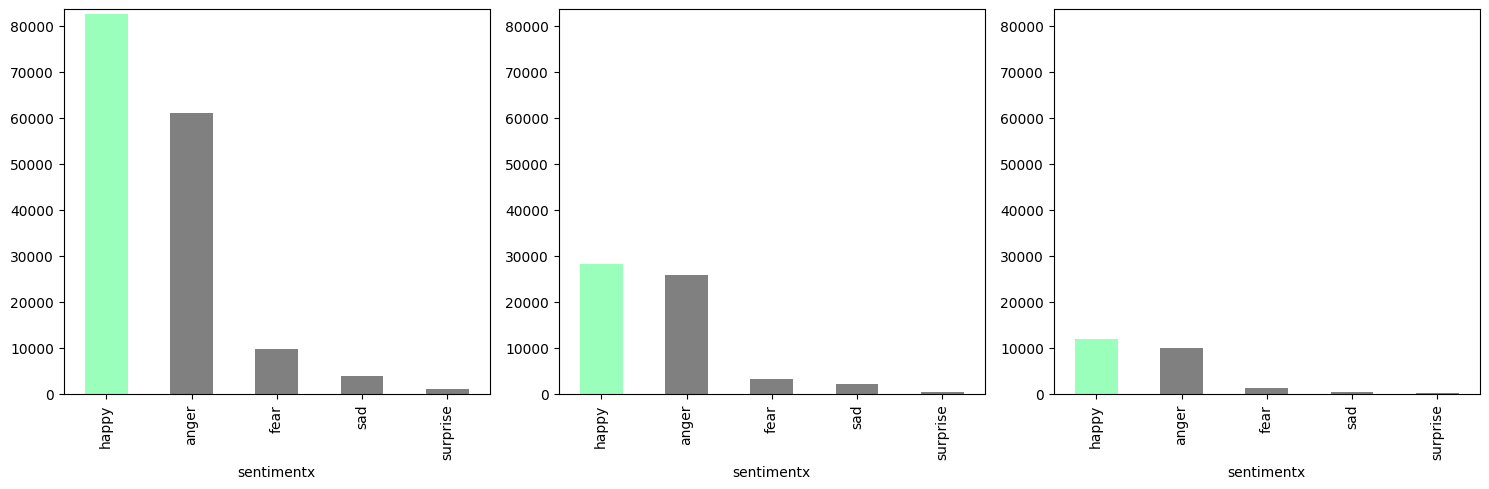

In [102]:
# Define colors for the bar chart
highest_value_color = (153/255, 255/255, 187/255)  # Light green color
other_values_color = 'gray'


def plot_sentiment_bar_chart(ax, df):
    value_counts = df.sentimentx.value_counts()
    colors = [highest_value_color if count == value_counts.max() else other_values_color for count in value_counts]
    ax = value_counts.plot(kind='bar', color=colors, ax=ax)
    ax.set_ylim(0, max_y+1000)

    return ax

# Determine the maximum y limit
max_y = max(demo1['sentimentx'].value_counts().max(),
            demo2['sentimentx'].value_counts().max(),
            demo3['sentimentx'].value_counts().max())


# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot sentiment bar chart for each demo DataFrame
plot_sentiment_bar_chart(axs[0], demo1)
plot_sentiment_bar_chart(axs[1], demo2)
plot_sentiment_bar_chart(axs[2], demo3)

# Show the plot
plt.tight_layout()
plt.show()

In [103]:
demo1.sentimentx.value_counts().sort_index()

sentimentx
anger       61042
fear         9707
happy       82660
sad          3988
surprise     1006
Name: count, dtype: int64

In [104]:
spm = []
spm.append(demo1.sentimentx.value_counts().sort_index().tolist())
spm.append(demo2.sentimentx.value_counts().sort_index().tolist())
spm.append(demo3.sentimentx.value_counts().sort_index().tolist())
spm = np.array(spm)
spm

array([[61042,  9707, 82660,  3988,  1006],
       [25790,  3313, 28243,  2097,   337],
       [10068,  1260, 11897,   502,   148]])

In [105]:
sums = np.sum(spm, axis=1)
# Normalize each inner array to percentages
spm2 = (spm.T / sums).T * 100
# print(spm2)

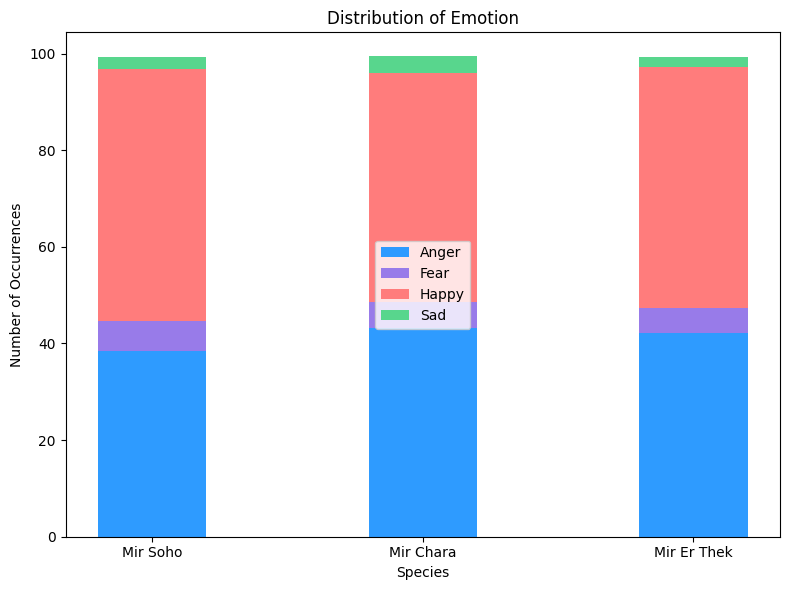

In [106]:
# Define custom colors for each sentiment type
colors = ['#2E9BFF', '#987BE9', '#FF7C7C', '#58D68D', 'red', 'green', 'blue']

species = (
    "Mir Soho",  
    "Mir Chara", 
    "Mir Er Thek",  
)
weight_counts = {
    "Anger": spm2.T[0],
    "Fear": spm2.T[1],
    'Happy':spm2.T[2],
    "Sad": spm2.T[3],
#     "Surprise":spm2.T[4]
}

# Calculate the number of sentiment types
num_sentiments = len(weight_counts)

# Adjust width based on the number of sentiment types
width = 0.4

fig, ax = plt.subplots(figsize=(8, 6))

# Initialize bottom values with zeros for stacking
bottom = np.zeros(len(species))

# Stack the bars for each sentiment type with custom colors
for i, (sentiment, count) in enumerate(weight_counts.items()):
    plt.bar(species, count, width, label=sentiment, bottom=bottom, color=colors[i])
    bottom += count  # Update bottom for stacking

# Add labels and title
plt.xlabel("Species")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of Emotion")

# Adjust legend location
plt.legend(loc="center")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Ack
https://colab.research.google.com/drive/15h32YuSQ5YwVji8OynC9BvMaWGpsWyD2?usp=sharing#scrollTo=XGj0RdguKrDb
https://github.com/sagorbrur/bnlp/blob/main/docs/README.md#bengali-corpus-class